In [2]:
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [39]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import csv
from tqdm import tqdm
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
file_one = "../clean-data/Whiskey_data/Whiskey_Advocate_All_scraped_KHupdate-with-description.csv"


In [28]:
df = pd.read_csv(file_one, encoding="ISO-8859-1").set_index('row_caller')


In [29]:
df.head()

,Maker,distilled,age in cast,ABV,Blended,Bourbon,Flavored,Other,Rye,Scotch,single blended grain,single blended malt,world,review score,price,style,country,iso_3,row_other,description
row_caller,,,,,,,,,,,,,,,,,,,,
1,Johnnie Walker,NaN,NaN,40.00%,1,0,0,0,0,1,0,0,0,97,225,Blended Scotch Whisky,UK,GBR,2.0,"Magnificently powerful and intense. Caramels, ..."
2,Black Bowmore,1964.0,42 year old,40.50%,0,0,0,0,0,1,0,1,0,97,4500,Single Malt Scotch,UK,GBR,3.0,What impresses me most is how this whisky evol...
3,Bowmore,NaN,46 year old,42.90%,0,0,0,0,0,1,0,1,0,97,13500,Single Malt Scotch,UK,GBR,4.0,There have been some legendary Bowmores from t...
4,Compass Box,NaN,30 years old,53.40%,1,0,0,0,0,1,0,1,0,96,325,Blended Malt Scotch Whisky,UK,GBR,5.0,With a name inspired by a 1926 Buster Keaton m...
5,Chivas,NaN,NaN,40.00%,1,0,0,0,0,1,0,1,0,96,160,Blended Malt Scotch Whisky,UK,GBR,6.0,"Captivating, enticing, and wonderfully charmin..."


In [30]:
countries=df["iso_3"].unique()
countries

array(['GBR', 'IRL', 'USA', 'FRA', 'BEL', 'SWE', 'FIN', 'JPN', 'IND',
       'TWN', 'NDL', 'AUS', 'AUT', 'CHE', 'CZE', 'DKN', 'ESP', 'MEX',
       'LIE', 'NZL', 'ARG', 'ZAF', 'ITA', 'ISL', 'BTN', 'CAN', 'GEO'],
      dtype=object)

In [31]:
gbr_df=df[df['iso_3'] == "GBR"]
irl_df=df[df['iso_3'] == "IRL"]
usa_df=df[df['iso_3'] == "USA"]
fra_df=df[df['iso_3'] == "FRA"]
bel_df=df[df['iso_3'] == "BEL"]
sew_df=df[df['iso_3'] == "SEW"]
fin_df=df[df['iso_3'] == "FIN"]
jpn_df=df[df['iso_3'] == "JPN"]
ind_df=df[df['iso_3'] == "IND"]
twn_df=df[df['iso_3'] == "TWN"]
nld_df=df[df['iso_3'] == "NLD"]
aus_df=df[df['iso_3'] == "AUS"]
aut_df=df[df['iso_3'] == "AUT"]
che_df=df[df['iso_3'] == "CHE"]
cze_df=df[df['iso_3'] == "CZE"]
dnk_df=df[df['iso_3'] == "DNK"]
esp_df=df[df['iso_3'] == "ESP"]
mex_df=df[df['iso_3'] == "MEX"]
lie_df=df[df['iso_3'] == "LIE"]
nzl_df=df[df['iso_3'] == "NZL"]
arg_df=df[df['iso_3'] == "ARG"]
zaf_df=df[df['iso_3'] == "ZAF"]
ita_df=df[df['iso_3'] == "ITA"]
isl_df=df[df['iso_3'] == "ISL"]
btn_df=df[df['iso_3'] == "BTN"]
can_df=df[df['iso_3'] == "CAN"]
geo_df=df[df['iso_3'] == "GEO"]

df_sets=[gbr_df, irl_df, usa_df, fra_df, bel_df, sew_df, fin_df, jpn_df, ind_df, twn_df, nld_df, aus_df, aut_df, che_df, cze_df, dnk_df, esp_df, mex_df, lie_df, nzl_df, arg_df, zaf_df, ita_df, isl_df, btn_df, can_df, geo_df]


In [35]:
sr= stopwords.words('english')
newStopWords = ["'s","whisky","whiskey"]
sr.extend(newStopWords)

In [ ]:
text=gbr_df["description"].str.cat(sep=' ').lower().strip()
text=text.replace("  ", " ").replace(".", "").replace(",", "").replace("!", "").replace("'", "").replace('"', "").replace(";", "").replace(":", "").replace("(", "").replace(")", "").replace("/", "")
# print(text)
clean_text=text.split(" ")    
# print(clean_text[0:6])
for word in clean_text:
    if word in sr:        
        clean_text.remove(word)
tokens=[]
for word in clean_text:
    tokens.append(word)
# print(tokens)
clean_tokens = tokens[:]
for token in tokens:
    if token in sr:
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
# for key,val in freq.items():
#     print(str(key) + ':' + str(val))
freq.plot(15, title='Description Words Frequency', color='#CC8E69', linewidth=5, cumulative=False)
result = dict()
for word, frequency in freq.most_common(20):
    result[word] = frequency
# print(result)
wordcloud = WordCloud(max_font_size=50,max_words=100,background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

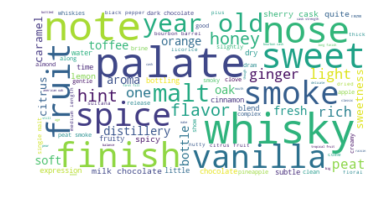